In [26]:
import logging
import os
from gensim import corpora, utils
from gensim.models.wrappers.dtmmodel import DtmModel
import numpy as np
import time
import pylab as plt
import seaborn as sb

%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


### Get SQLITE Data

In [76]:
import pandas as pd
import sqlite3

db_list = ["pg010904","pg010911","pg010918","pg010925"]
documents = []
for db in db_list:
    # write to sqlite db
    con = sqlite3.connect("../Data/Patent_Grant_Full_Text_Data_SGML_Version_2.4_JAN_2001_DEC_2001/{}.sqlite".format(db))
    new = pd.read_sql("SELECT * FROM patents", con) 
    sample_idx = np.random.choice(len(new), 100, replace=False) # uniform random sample, 100 out of all patents
    documents += [new["abstract"].values[i].split() for i in sample_idx]


In [4]:
#data = new[["pat_date","abstract"]]

In [92]:
#documents = [data["abstract"].values[i].split() for i in range(len(data["abstract"]))]

In [83]:
time_seq = [100]*4
time_seq

[100, 100, 100, 100]

In [78]:
class DTMcorpus(corpora.textcorpus.TextCorpus):

    def get_texts(self):
        return self.input

    def __len__(self):
        return len(self.input)

In [79]:
corpus = DTMcorpus(documents)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(4629 unique tokens: [u'stock', u'limited', u'oxygenation', u'sourceline', u'helical']...) from 400 documents (total 28849 corpus positions)


In [80]:
dtm_home = os.environ.get('DTM_HOME', "dtm-master")
dtm_path = os.path.join(dtm_home, 'bin', 'dtm-darwin64') if dtm_home else None

In [93]:
t0 = time.time()
model = DtmModel(dtm_path,corpus,time_seq,num_topics=20,id2word=corpus.dictionary,initialize_lda=True)
delta = time.time() - t0
print "took: {} seconds.".format(delta)

INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/effeb_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/effeb_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 4629 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/effeb_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=20 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/effeb_train --outname=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/effeb_train_out --alpha=0.01 --lda_max_em_iter=10 --lda_sequence_min_iter=6  --lda_sequence_max_iter=20 --top_chain_var=0.005 --rng_seed=0 
INFO:gensim.models.wrappers.dtmmodel:Running command ['dtm-master/bin/dtm-darwin64', '--ntopics

took: 57.0287020206 seconds.


In [94]:
topics = model.show_topics(topics=20,times=4, topn=7)
topics

[u'0.022*source + 0.019*process + 0.018*metal + 0.015*form + 0.013*catalyst + 0.013*method + 0.012*surface',
 u'0.026*water + 0.021*level + 0.019*bit + 0.016*high + 0.016*channel + 0.016*lock + 0.016*piece',
 u'0.016*say + 0.015*least + 0.015*mean + 0.012*low + 0.011*sensor + 0.010*lower + 0.010*prepare',
 u'0.040*drive + 0.035*sheet + 0.021*member + 0.021*position + 0.020*unit + 0.020*coil + 0.018*device',
 u'0.019*plurality + 0.017*provide + 0.015*one + 0.015*base + 0.013*vehicle + 0.010*disclose + 0.010*press',
 u'0.049*member + 0.040*first + 0.030*second + 0.029*form + 0.026*plate + 0.021*support + 0.020*metal',
 u'0.037*platform + 0.033*target + 0.032*information + 0.022*control + 0.021*include + 0.021*address + 0.019*provide',
 u'0.031*include + 0.030*end + 0.026*body + 0.024*side + 0.023*portion + 0.022*cover + 0.021*wall',
 u'0.028*user + 0.020*communication + 0.020*unit + 0.015*system + 0.015*network + 0.014*point + 0.014*request',
 u'0.024*signal + 0.021*switch + 0.020*circui

## DTM TIME SCALING

### Run Time vs. Number of Topics

In [15]:
n_tops = range(2,11)
time_seq = [25]*4
corpus = DTMcorpus(documents[:100])
topic_times = []
for n_top in n_tops:
    t0 = time.time()
    model = DtmModel(dtm_path,corpus,time_seq,num_topics=n_top,id2word=corpus.dictionary,initialize_lda=True)
    delta = time.time() - t0
    topic_times.append((100,4,n_top,delta))
    print "{} topics took: {} seconds.".format(n_top,delta)
topic_times = np.array(topic_times)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1746 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 100 documents (total 7140 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/4913d_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/4913d_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1746 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/4913d_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=2 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/4913d_train --outname=/var/folders/ym/v3

2 topics took: 4.21448588371 seconds.
3 topics took: 4.89845490456 seconds.

INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/de2c81_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/de2c81_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1746 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/de2c81_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=4 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/de2c81_train --outname=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/de2c81_train_out --alpha=0.01 --lda_max_em_iter=10 --lda_sequence_min_iter=6  --lda_sequence_max_iter=20 --top_chain_var=0.005 --rng_seed=0 
INFO:gensim.models.wrappers.dtmmodel:Running command ['dtm-master/bin/dtm-darwin64', '--nto


4 topics took: 5.5292570591 seconds.

INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/b34a3f_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/b34a3f_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1746 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/b34a3f_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/b34a3f_train --outname=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/b34a3f_train_out --alpha=0.01 --lda_max_em_iter=10 --lda_sequence_min_iter=6  --lda_sequence_max_iter=20 --top_chain_var=0.005 --rng_seed=0 
INFO:gensim.models.wrappers.dtmmodel:Running command ['dtm-master/bin/dtm-darwin64', '--nto


5 topics took: 6.21239590645 seconds.

INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/6c6c76_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/6c6c76_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1746 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/6c6c76_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=6 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/6c6c76_train --outname=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/6c6c76_train_out --alpha=0.01 --lda_max_em_iter=10 --lda_sequence_min_iter=6  --lda_sequence_max_iter=20 --top_chain_var=0.005 --rng_seed=0 
INFO:gensim.models.wrappers.dtmmodel:Running command ['dtm-master/bin/dtm-darwin64', '--nto


6 topics took: 7.32249212265 seconds.

INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/fd50ad_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/fd50ad_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1746 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/fd50ad_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=7 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/fd50ad_train --outname=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/fd50ad_train_out --alpha=0.01 --lda_max_em_iter=10 --lda_sequence_min_iter=6  --lda_sequence_max_iter=20 --top_chain_var=0.005 --rng_seed=0 
INFO:gensim.models.wrappers.dtmmodel:Running command ['dtm-master/bin/dtm-darwin64', '--nto


7 topics took: 7.56991100311 seconds.

INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/b71fe2_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/b71fe2_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1746 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/b71fe2_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=8 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/b71fe2_train --outname=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/b71fe2_train_out --alpha=0.01 --lda_max_em_iter=10 --lda_sequence_min_iter=6  --lda_sequence_max_iter=20 --top_chain_var=0.005 --rng_seed=0 
INFO:gensim.models.wrappers.dtmmodel:Running command ['dtm-master/bin/dtm-darwin64', '--nto


8 topics took: 8.38314294815 seconds.

INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/7aebb3_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/7aebb3_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1746 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/7aebb3_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=9 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/7aebb3_train --outname=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/7aebb3_train_out --alpha=0.01 --lda_max_em_iter=10 --lda_sequence_min_iter=6  --lda_sequence_max_iter=20 --top_chain_var=0.005 --rng_seed=0 
INFO:gensim.models.wrappers.dtmmodel:Running command ['dtm-master/bin/dtm-darwin64', '--nto


9 topics took: 8.69687390327 seconds.

INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/2d3f4e_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/2d3f4e_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1746 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/2d3f4e_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=10 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/2d3f4e_train --outname=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/2d3f4e_train_out --alpha=0.01 --lda_max_em_iter=10 --lda_sequence_min_iter=6  --lda_sequence_max_iter=20 --top_chain_var=0.005 --rng_seed=0 
INFO:gensim.models.wrappers.dtmmodel:Running command ['dtm-master/bin/dtm-darwin64', '--nt


10 topics took: 9.57473897934 seconds.


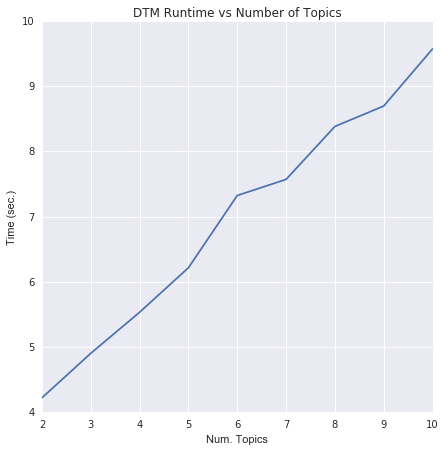

0.821436781875


In [64]:
plt.figure(figsize = (7,7))
plt.plot(topic_times[:,2],topic_times[:,3])
plt.xlabel("Num. Topics")
plt.ylabel("Time (sec.)")
plt.title("DTM Runtime vs Number of Topics")
plt.show()
print np.mean(topic_times[:,2]/topic_times[:,3]) # average slope
# 1.29 seconds for each new topic
# .82 topics/sec

### Run Time Vs. Number of Documents

In [32]:
n_tops = 5
doc_times = []
for i in range(10):
    n_docs = 100 + i*16
    corpus = DTMcorpus(documents[:n_docs])
    time_seq = [25 + 4*i]*4
    t0 = time.time()
    model = DtmModel(dtm_path,corpus,time_seq,num_topics=n_tops,id2word=corpus.dictionary,initialize_lda=True)
    delta = time.time() - t0
    doc_times.append((n_docs,4,n_tops,delta))
    print "{} docs took: {} seconds.".format(n_docs,delta)
doc_times = np.array(doc_times)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1746 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 100 documents (total 7140 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/e8681a_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/e8681a_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1746 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/e8681a_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/e8681a_train --outname=/var/folders/y

100 docs took: 6.51437282562 seconds.
116 docs took: 7.68797397614 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2045 unique tokens: [u'represent', u'helical', u'magnetic', u'yellow', u'four']...) from 132 documents (total 9374 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/571fa8_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/571fa8_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 2045 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/571fa8_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/571fa8_train --outname=/var/folders/ym


132 docs took: 7.85121798515 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2204 unique tokens: [u'represent', u'helical', u'magnetic', u'yellow', u'four']...) from 148 documents (total 10675 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/89cbe0_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/89cbe0_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 2204 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/89cbe0_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/89cbe0_train --outname=/var/folders/y


148 docs took: 9.25326013565 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2341 unique tokens: [u'represent', u'helical', u'magnetic', u'yellow', u'four']...) from 164 documents (total 11927 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/ba7001_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/ba7001_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 2341 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/ba7001_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/ba7001_train --outname=/var/folders/y


164 docs took: 9.75275397301 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2467 unique tokens: [u'represent', u'helical', u'magnetic', u'yellow', u'four']...) from 180 documents (total 13090 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/5c6964_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/5c6964_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 2467 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/5c6964_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/5c6964_train --outname=/var/folders/y


180 docs took: 11.4734289646 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2646 unique tokens: [u'represent', u'helical', u'magnetic', u'yellow', u'four']...) from 196 documents (total 14486 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/be9d67_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/be9d67_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 2646 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/be9d67_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/be9d67_train --outname=/var/folders/y


196 docs took: 11.9210710526 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2788 unique tokens: [u'represent', u'helical', u'magnetic', u'yellow', u'four']...) from 212 documents (total 15851 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/36aebd_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/36aebd_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 2788 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/36aebd_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/36aebd_train --outname=/var/folders/y


212 docs took: 11.7957777977 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2905 unique tokens: [u'represent', u'helical', u'magnetic', u'dynamic', u'yellow']...) from 228 documents (total 16976 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/f537a7_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/f537a7_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 2905 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/f537a7_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/f537a7_train --outname=/var/folder


228 docs took: 13.1372599602 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(3010 unique tokens: [u'represent', u'helical', u'magnetic', u'dynamic', u'yellow']...) from 244 documents (total 18183 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/efdba1_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/efdba1_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 3010 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/efdba1_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/efdba1_train --outname=/var/folder


244 docs took: 14.6317107677 seconds.


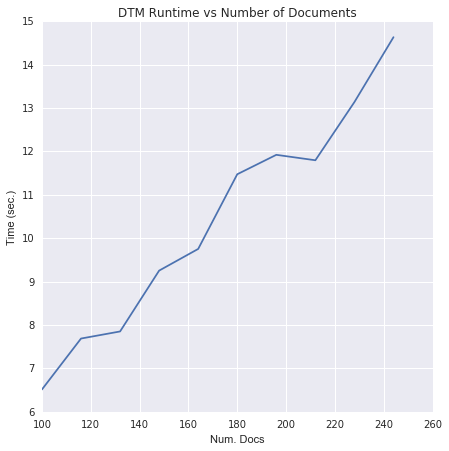

0.0610677443471


In [63]:
plt.figure(figsize = (7,7))
plt.plot(doc_times[:,0],doc_times[:,3])
plt.xlabel("Num. Docs")
plt.ylabel("Time (sec.)")
plt.title("DTM Runtime vs Number of Documents")
plt.show()
print np.mean(doc_times[:,3]/doc_times[:,0]) # average slope
#  16.4 docs/sec
#  .061 seconds pr. document added.

### Run Time Vs. Number of Time Periods

In [57]:
n_tops = 5
period_times = []
for i in range(16):
    time_seq = [np.floor(100/(4.0+i))]*(4+i)
    n_docs = int(np.sum(time_seq))
    corpus = DTMcorpus(documents[:n_docs])
    
    #while np.sum(time_seq) < n_docs:
    #    time_seq[-1] += 1
    t0 = time.time()
    model = DtmModel(dtm_path,corpus,time_seq,num_topics=n_tops,id2word=corpus.dictionary,initialize_lda=True)
    delta = time.time() - t0
    period_times.append((n_docs,4+i,n_tops,delta))
    
    print "{} time periods took: {} seconds.".format(4+i,delta)
period_times = np.array(period_times)

# will throw an error if you give it a different number of documents at each time slice! Important!

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1746 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 100 documents (total 7140 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/40b241_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/40b241_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1746 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/40b241_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/40b241_train --outname=/var/folders/y

4 time periods took: 6.60046601295 seconds.
5 time periods took: 8.00951290131 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1717 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 96 documents (total 6705 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/26f76c_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/26f76c_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1717 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/26f76c_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/26f76c_train --outname=/var/folders/ym


6 time periods took: 8.56364393234 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1732 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 98 documents (total 6957 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/62df0f_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/62df0f_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1732 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/62df0f_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/62df0f_train --outname=/var/folders/ym


7 time periods took: 10.4791138172 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1717 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 96 documents (total 6705 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/1d6933_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/1d6933_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1717 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/1d6933_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/1d6933_train --outname=/var/folders/ym


8 time periods took: 11.4318170547 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1741 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 99 documents (total 7099 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/c17ef6_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/c17ef6_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1741 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/c17ef6_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/c17ef6_train --outname=/var/folders/ym


9 time periods took: 14.0486268997 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1746 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 100 documents (total 7140 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/8ca234_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/8ca234_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1746 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/8ca234_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/8ca234_train --outname=/var/folders/y


10 time periods took: 22.2250471115 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1741 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 99 documents (total 7099 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/6fb554_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/6fb554_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1741 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/6fb554_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/6fb554_train --outname=/var/folders/ym


11 time periods took: 18.0523798466 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1717 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 96 documents (total 6705 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/27db5_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/27db5_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1717 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/27db5_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/27db5_train --outname=/var/folders/ym/v3b


12 time periods took: 19.2001178265 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1657 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 91 documents (total 6255 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/b84f1e_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/b84f1e_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1657 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/b84f1e_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/b84f1e_train --outname=/var/folders/ym


13 time periods took: 20.0541908741 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1732 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 98 documents (total 6957 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/e44d19_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/e44d19_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1732 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/e44d19_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/e44d19_train --outname=/var/folders/ym


14 time periods took: 23.0349359512 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1646 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 90 documents (total 6187 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/f90d55_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/f90d55_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1646 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/f90d55_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/f90d55_train --outname=/var/folders/ym


15 time periods took: 28.2628409863 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1717 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 96 documents (total 6705 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/f055e0_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/f055e0_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1717 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/f055e0_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/f055e0_train --outname=/var/folders/ym


16 time periods took: 37.0440330505 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1592 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 85 documents (total 5873 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/96ebd1_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/96ebd1_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1592 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/96ebd1_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/96ebd1_train --outname=/var/folders/ym


17 time periods took: 28.7371919155 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1646 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 90 documents (total 6187 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/d3d244_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/d3d244_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1646 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/d3d244_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/d3d244_train --outname=/var/folders/ym


18 time periods took: 29.0659558773 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1698 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 95 documents (total 6629 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/e29ab0_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/e29ab0_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1698 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/e29ab0_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/e29ab0_train --outname=/var/folders/ym


19 time periods took: 34.3542330265 seconds.


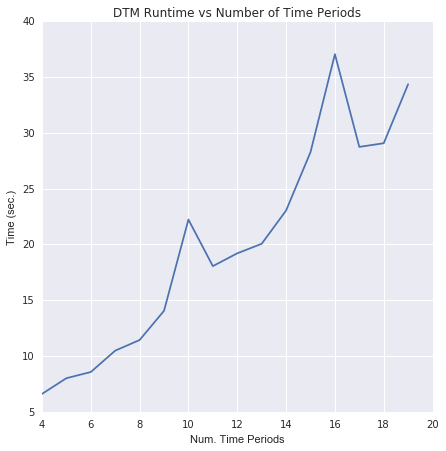

1.62795038356


In [61]:
plt.figure(figsize = (7,7))
plt.plot(period_times[:,1],period_times[:,3])
plt.xlabel("Num. Time Periods")
plt.ylabel("Time (sec.)")
plt.title("DTM Runtime vs Number of Time Periods")
plt.show()
print np.median(period_times[:,3]/period_times[:,1]) # average slope
# approximately .61 time periods/sec => 1.62 seconds pr new time period. (number of documents was kept approximately constant)
# noise in line comes from difficulty ensuring the same total number of documents across rounds. 

In [68]:
n_tops = 5
period_times = []
for i in range(10):
    time_seq = [20]*(4+i)
    n_docs = np.sum(time_seq)
    corpus = DTMcorpus(documents[:n_docs])

    t0 = time.time()
    model = DtmModel(dtm_path,corpus,time_seq,num_topics=n_tops,id2word=corpus.dictionary,initialize_lda=True)
    delta = time.time() - t0
    period_times.append((n_docs,4+i,n_tops,delta))
    
    print "{} time periods took: {} seconds.".format(4+i,delta)
period_times = np.array(period_times)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1527 unique tokens: [u'helical', u'magnetic', u'yellow', u'circuitry', u'whose']...) from 80 documents (total 5537 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/598299_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/598299_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1527 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/598299_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/598299_train --outname=/var/folders/ym

4 time periods took: 5.34930419922 seconds.
5 time periods took: 7.47433996201 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(1949 unique tokens: [u'represent', u'helical', u'magnetic', u'yellow', u'four']...) from 120 documents (total 8700 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/c92fab_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/c92fab_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 1949 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/c92fab_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/c92fab_train --outname=/var/folders/ym


6 time periods took: 10.3414740562 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2134 unique tokens: [u'represent', u'helical', u'magnetic', u'yellow', u'four']...) from 140 documents (total 10122 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/3f717_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/3f717_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 2134 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/3f717_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/3f717_train --outname=/var/folders/ym/v3


7 time periods took: 13.6101050377 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2303 unique tokens: [u'represent', u'helical', u'magnetic', u'yellow', u'four']...) from 160 documents (total 11470 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/473d1d_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/473d1d_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 2303 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/473d1d_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/473d1d_train --outname=/var/folders/y


8 time periods took: 18.1515240669 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2467 unique tokens: [u'represent', u'helical', u'magnetic', u'yellow', u'four']...) from 180 documents (total 13090 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/a57ce1_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/a57ce1_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 2467 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/a57ce1_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/a57ce1_train --outname=/var/folders/y


9 time periods took: 22.8161039352 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2681 unique tokens: [u'represent', u'helical', u'magnetic', u'yellow', u'four']...) from 200 documents (total 14884 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/59e554_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/59e554_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 2681 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/59e554_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/59e554_train --outname=/var/folders/y


10 time periods took: 27.89113307 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2850 unique tokens: [u'represent', u'helical', u'magnetic', u'dynamic', u'yellow']...) from 220 documents (total 16390 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/69925a_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/69925a_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 2850 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/69925a_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/69925a_train --outname=/var/folder


11 time periods took: 41.3650360107 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(2992 unique tokens: [u'represent', u'helical', u'magnetic', u'dynamic', u'yellow']...) from 240 documents (total 17920 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/72e374_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/72e374_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 2992 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/72e374_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/72e374_train --outname=/var/folder


12 time periods took: 75.5713999271 seconds.

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(3111 unique tokens: [u'represent', u'helical', u'magnetic', u'dynamic', u'yellow']...) from 260 documents (total 19276 corpus positions)
INFO:gensim.models.wrappers.dtmmodel:serializing temporary corpus to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/59d5d4_train-mult.dat
INFO:gensim.corpora.bleicorpus:no word id mapping provided; initializing from corpus
INFO:gensim.corpora.bleicorpus:storing corpus in Blei's LDA-C format into /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/59d5d4_train-mult.dat
INFO:gensim.corpora.bleicorpus:saving vocabulary of 3111 words to /var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/59d5d4_train-mult.dat.vocab
INFO:gensim.models.wrappers.dtmmodel:training DTM with args --ntopics=5 --model=dtm  --mode=fit --initialize_lda=true --corpus_prefix=/var/folders/ym/v3by8lmd2bx3jpygmrlfq00m0000gn/T/59d5d4_train --outname=/var/folder


13 time periods took: 62.5043888092 seconds.


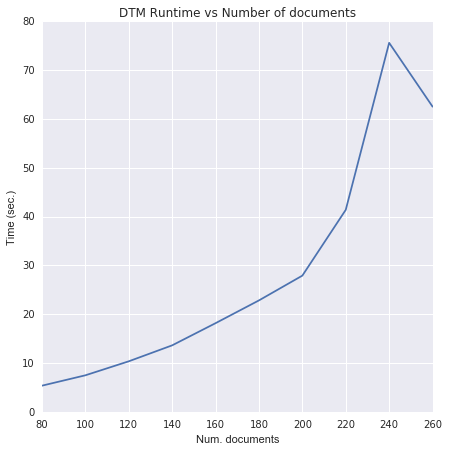

In [73]:
plt.figure(figsize = (7,7))
plt.plot(period_times[:,0],period_times[:,3])
plt.xlabel("Num. documents")
plt.ylabel("Time (sec.)")
plt.title("DTM Runtime vs Number of documents")
plt.show()
# looks exponential...
# (total number of documents was increased with each new time period)
